<a href="https://colab.research.google.com/github/Moksh45/PyTorch-for-deep-learning/blob/main/01_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn #nn contains all of Pytorch's building block for neural network
import matplotlib.pyplot as plt

## Data (Preparing and loading)

Data can be almost anything... in machine learning
* Excel speadsheet
* image of any kind
* Video (YouTube has lot of Data)
* Audio like songs or podcast
* DNA
* Text


Machine learning is a game of two parts:



1.   Get data into a numerical represntation
2.   Bulid a model to learn patterns in that numerical representation

To showcase this let's create some know data using the linear regression formula.

We'll usea linear regression formula to make a straight line with *Know* **Parameters**.

In [2]:
weight = 0.7
bias = 0.3

#create 
start = 0
end = 1
step = 0.02
x = torch.arange(start,end,step).unsqueeze(dim=1)
#y = mx + B
y = weight*x + bias

x[:10],y[:10] 

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(x),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concept in machine learning in general)

In [4]:
# create a train/test split 
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is Where the data explorer's motto comes in!

"Visualize Visualize Visualize!"

In [5]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

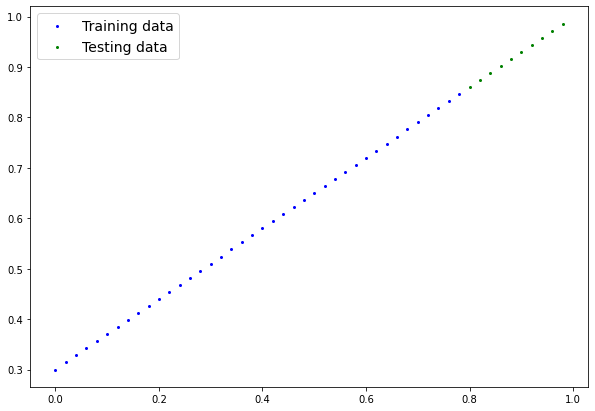

In [6]:
plot_predictions();

2 Build Model

our first PyTorch model!

This is very exciting ...let's do it!


What our Model does:


*   Start with random values (Weight & bias)
*   Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data) 

How does it do so?

Through two main algorithms:


1.   Gradient desent
2.   Backpropagation







In [7]:
from torch import nn

class LinearRegressionMobel(nn.Module):   #<- almost everything in Pytorch inherhits from nn.Module
  def __init__(self):    #constructor
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
  #forward method to define the computition in the model
  def forward (self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias 

In [8]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside.

So we can chek out model parameters or what's inside our model using .`Parameters().`

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionMobel()

# Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameter
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the forward() method.

In [13]:
# Make predictions with model

# with torch.inference_mode():
#   y_preds = model_0(x_test)

# Both are doing same thing

with torch.no_grad():
  y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

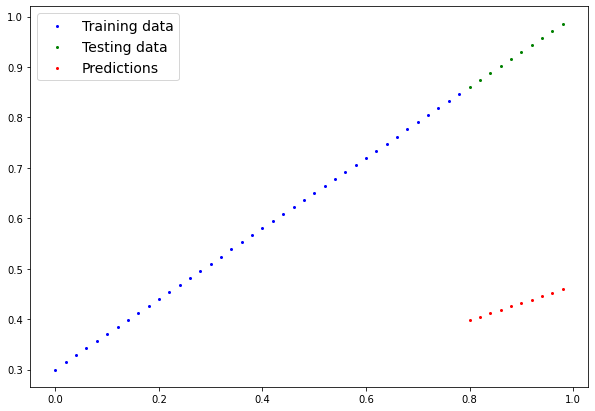

In [14]:
plot_predictions(predictions=y_preds)